**IMPORTOWANIE PAKIETÓW**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**POBRANIE DANYCH**

In [2]:
df = pd.read_csv("C:/Users/48690/Downloads/Animation_Movies/Animation_Movies.csv")

**ZADANIE 1**

In [4]:
print("Rozmiar danych:")
print(df.shape)
print("Typy danych:")
print(df.dtypes)
print("Liczba braków danych:")
print(df.isnull().sum())
print("Liczba unikalnych  tytułów:")
print(df.title.unique().shape)

Rozmiar danych:
(51945, 23)
Typy danych:
id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
dtype: object
Liczba braków danych:
id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue

Zbiór danych zawiera łącznie 23 zmienne, w tym:
7 zmiennych liczbowych,
15 zmiennych tekstowych,
1 zmienną logiczną.
Warto zauważyć, że liczba wierszy i unikalnych tytułów jest różna co świadczy o tym, że część się powtarza.

**ZADANIE 2**

In [5]:
print(df.describe())

                 id  vote_average    vote_count       revenue       runtime  \
count  5.194500e+04  51945.000000  51945.000000  5.194500e+04  51945.000000   
mean   6.188122e+05      2.597083     40.395380  1.863464e+06     20.901415   
std    3.479748e+05      3.318748    482.705948  3.049824e+07     39.016002   
min    1.200000e+01      0.000000      0.000000  0.000000e+00      0.000000   
25%    3.300810e+05      0.000000      0.000000  0.000000e+00      3.000000   
50%    6.119150e+05      0.000000      0.000000  0.000000e+00      7.000000   
75%    9.159040e+05      6.000000      2.000000  0.000000e+00     19.000000   
max    1.238314e+06     10.000000  19463.000000  1.450027e+09   3720.000000   

             budget    popularity  
count  5.194500e+04  51945.000000  
mean   5.759513e+05      1.886233  
std    7.606628e+06      9.700913  
min    0.000000e+00      0.000000  
25%    0.000000e+00      0.600000  
50%    0.000000e+00      0.600000  
75%    0.000000e+00      0.882000  


Średnia ocena filmów animowanych to około 2.59/10, jednakże filmy, które nie były oceniane przez nikogo mocno zaniżają te wartość i przy głębszej analizie powinno uwzględnić tylko niezerowe głosy. Dodatkowo filmy animowane średnio przynoszą zyski, choć i tu statystyki są nie pełne.

**ZADANIE 3**

In [6]:
print(df.groupby("adult")["popularity"].describe())

         count      mean       std  min  25%  50%    75%       max
adult                                                             
False  51719.0  1.888212  9.717078  0.0  0.6  0.6  0.883  1008.942
True     226.0  1.433327  4.708325  0.0  0.0  0.6  0.600    38.519


Filmy przeznaczone dla osób dorosłych (mające pewne ograniczenia wiekowe) są znacznie mniej popularne. Jest ich mniej, a najbardziej popularny film tej kategorii jest parenaście razy mniej popularny od swojego "konkurenta".

**ZADANIE 4**

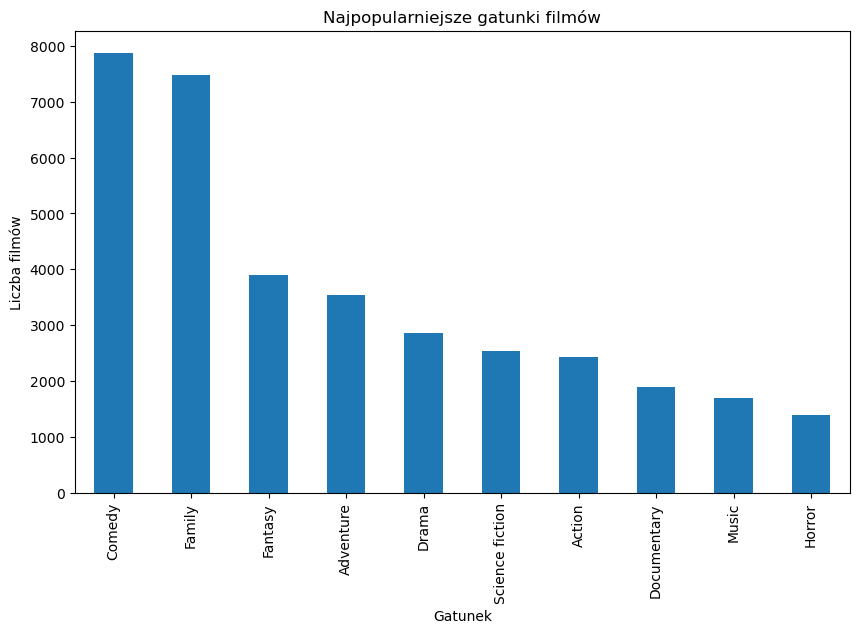

In [8]:
df['genres_list'] = df['genres'].str.split(',')
df['genres_list'] = df['genres_list'].apply(lambda lst: [x.strip().capitalize() for x in lst])


all_genres = df['genres_list'].explode()
all_genres = all_genres[all_genres != 'Animation']

#Musiałem, usunąć kategorie 'Animation', bo jest to baza danych z właśnie tylko takimi filmami.

genre_counts = all_genres.value_counts()


genre_counts.head(10).plot(kind='bar', figsize=(10,6))
plt.title("Najpopularniejsze gatunki filmów")
plt.xlabel("Gatunek")
plt.ylabel("Liczba filmów")
plt.show()

Najpoplarniejszym gatunkiem filmów animowanych są komedie. Dotychczas powstało ich prawie 8 tysięcy. Najmniej wyprudkowano animowannych horrorów, co wydaje się logiczne, bo filmy animowane często są skierowane do młodszej publiki. Warto też dodać, że jeden film może należeć do paru kategorii.

**ZADANIE 5**

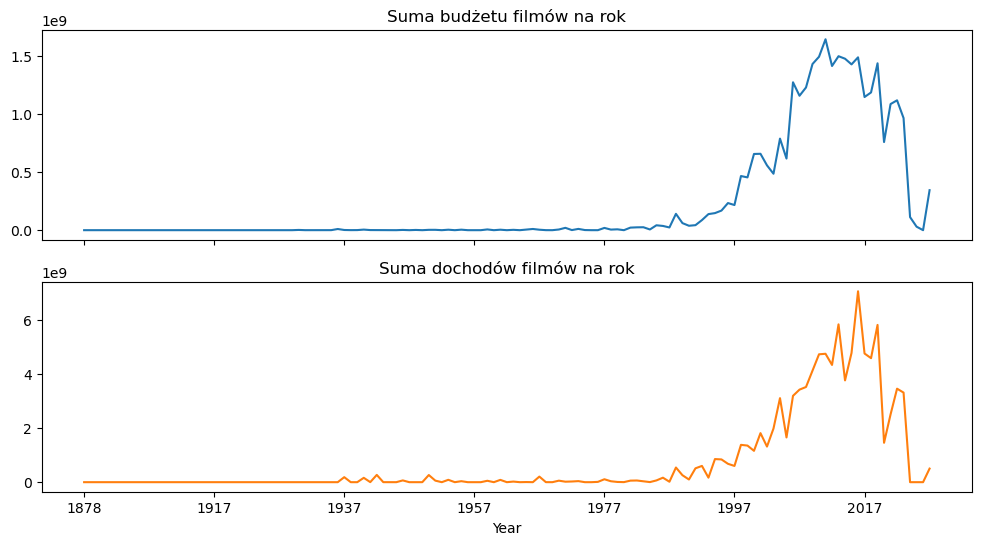

In [9]:
df["Year"] = df["release_date"].astype(str).str[:4]
agg_df = df.groupby("Year").agg({
    "budget": "sum",               
    "revenue": "sum"                
})

agg_df.plot.line(subplots=True, legend=False, figsize=(12, 6),
                 title=["Suma budżetu filmów na rok", "Suma dochodów filmów na rok"])

plt.show()

Roczne budżety i dochody filmów mają podobne zmiany. Od 30 lat filmy przynoszą około 4 razy większe pieiądze niż mają budżety.

**Nie byłem pewien czy chodzi o dwa wykresy takie jak powyżej, czy o różnych tematykach, więc w razie czego zrobiłem  jeszcze jeden**

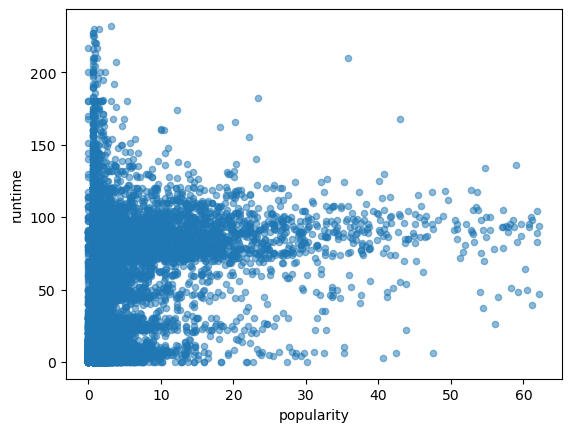

In [10]:
def outliers(df, column):
    Q1 = df[column].quantile(0.002)
    Q3 = df[column].quantile(0.998)
    
    return df[(df[column] >= Q1) & (df[column] <= Q3)]

# musiałem usunąc outliery więc zrobiłem krótką funkcje, która to tak mniej więcej robi

df_clean = outliers(df, 'popularity')
df_clean = outliers(df_clean, 'runtime')
df_clean.plot(x = "popularity", y = "runtime", kind = "scatter", alpha = 0.5)
plt.show()

Wykres pokazuje, że najbardziej popularne są filmy które trwają około 100 minut. Długie filmy trwające powyżek 3 godzin tracą na popularności, a krótkie poniżej 30 minut zszeszają sporą grupę fanów.